<a href="https://colab.research.google.com/github/LuisCGit/6.484-reinforcement-learning/blob/main/plotting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



## Faster GPUs

With Colab Pro you have priority access to our fastest GPUs and with Pro+ even more so. For example, you may get a T4 or P100 GPU at times when most users of standard Colab receive a slower K80 GPU. You can see what GPU you've been assigned at any time by executing the following cell.

If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to Runtime > Change runtime type in the menu to enable a GPU accelerator, and then re-execute the code cell.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the Runtime > Change runtime type menu, and then set the hardware accelerator dropdown to GPU.

## More memory

With Colab Pro you have the option to access high-memory VMs when they are available, and with Pro+ even more so. To set your notebook preference to use a high-memory runtime, select the Runtime > 'Change runtime type' menu, and then select High-RAM in the Runtime shape dropdown.

You can see how much memory you have available at any time by running the following code cell.



If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via Runtime > Change runtime type in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). While Colab Pro subscribers still have limits, these will be roughly twice the limits for non-subscribers, with even more stability for Pro+.

## Resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab Pro and Pro+, please avoid using resources when you don't need them. For example, only use a GPU or high-RAM runtime when required, and close Colab tabs when finished.


## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+. If you are interested in unlimited pay as you go usage to remove all imposed limits, please do let us know.

If you encounter errors or other issues with billing (payments) for Colab Pro or Pro+, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [38]:
import seaborn as sns
import pickle
import numpy as np

In [33]:
with open('/content/probability_all_envs2 (2).pkl', 'rb') as f:
  df_master = pickle.load(f)

In [ ]:
df['Seed'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
df_master.head()

,num_frames,smooth_reward,reward,policy_loss,value_loss,Algorithm,Seed,episode
0,250,0.0,0,-0.031460,69,explore,0,0
1,500,0.0,0,-0.029851,69,explore,0,1
2,750,0.0,0,-0.021226,69,explore,0,2
3,1000,0.0,0,-0.020180,69,explore,0,3
4,1250,0.0,0,-0.022323,69,explore,0,4


[Text(0.5, 1.0, 'Comparison of Various Model-Free RL Algorithms on DoorKey')]

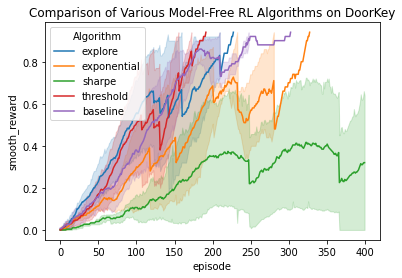

In [ ]:
sns.lineplot(data=df_master, x="episode", y="smooth_reward", hue="Algorithm",estimator="mean").set(
    title='Comparison of Various Model-Free RL Algorithms on DoorKey')

In [54]:
envs = df_master['environment'].unique()
env = envs[0]
df = df_master[df_master['environment'] == env]
df.groupby(["Algorithm", "Seed"], as_index = False).max().groupby('Algorithm').mean()['episode']

Algorithm
Baseline       72.833333
explore        59.800000
exponential    63.200000
threshold      67.833333
Name: episode, dtype: float64

In [56]:
df.groupby(["Algorithm", "Seed"], as_index = False).max().groupby('Algorithm').std()['episode']

Algorithm
Baseline       15.904926
explore        11.432410
exponential    13.863621
threshold      11.107055
Name: episode, dtype: float64

In [57]:
envs = df_master['environment'].unique()
env = envs[1]
df = df_master[df_master['environment'] == env]
df.groupby(["Algorithm", "Seed"], as_index = False).max().groupby('Algorithm').mean()['episode']

Algorithm
Baseline       191.833333
explore        150.600000
exponential    229.400000
threshold      358.000000
Name: episode, dtype: float64

In [59]:
df.groupby(["Algorithm", "Seed"], as_index = False).max().groupby('Algorithm').std()['episode']

Algorithm
Baseline        42.006745
explore         37.266607
exponential     46.548899
threshold      339.129474
Name: episode, dtype: float64

In [60]:
envs = df_master['environment'].unique()
env = envs[2]
df = df_master[df_master['environment'] == env]
df.groupby(["Algorithm", "Seed"], as_index = False).max().groupby('Algorithm').mean()['episode']

Algorithm
Baseline        420.333333
explore         480.000000
exponential    1090.000000
threshold       442.333333
Name: episode, dtype: float64

In [63]:
df.groupby(["Algorithm", "Seed"], as_index = False).max().groupby('Algorithm').std()['episode']

Algorithm
Baseline         87.399466
explore         217.654543
exponential    1165.075319
threshold       134.468832
Name: episode, dtype: float64

In [61]:
df = df_master[df_master['environment'] == envs[2]]
S = len(df_master['Seed'].unique())
E = len(df_master['episode'].unique())
fulls = []
for alg in ["explore", 'exponential', 'threshold', 'baseline']:
  avg = np.zeros((S,E))
  for seed in range(S):
      full = np.zeros((E,))
      y = df[(df['Algorithm'] == alg) & (df['Seed'] == seed )]['smooth_reward'].values
      full[:len(y)] = y
      for i in range(len(y), len(full)):
        full[i] = 0.94
      avg[seed] = full
  fulls.append(np.mean(avg, axis = 0))
  

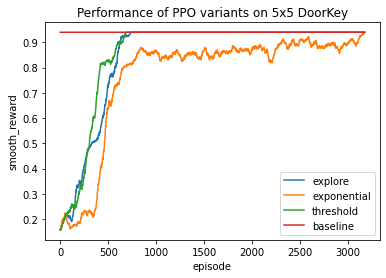

In [49]:
algs = ["explore", 'exponential', 'threshold', 'baseline']
for i, avg in enumerate(fulls):
  plt.plot(np.arange(E), avg, label = algs[i])
plt.legend()
plt.xlabel("episode")
plt.ylabel("smooth_reward")
plt.title("Performance of PPO variants on 5x5 DoorKey")
plt.savefig("elite.png")

In [45]:
df

,num_frames,smooth_reward,reward,policy_loss,value_loss,Algorithm,Seed,environment,episode
677,360,0.00,0,-0.025428,69,threshold,1,MiniGrid-DoorKey-6x6-v0,0
678,720,0.00,0,-0.022342,69,threshold,1,MiniGrid-DoorKey-6x6-v0,1
679,1080,0.00,0,-0.020929,69,threshold,1,MiniGrid-DoorKey-6x6-v0,2
680,1440,0.00,0,-0.021304,69,threshold,1,MiniGrid-DoorKey-6x6-v0,3
681,1800,0.00,0,-0.020633,69,threshold,1,MiniGrid-DoorKey-6x6-v0,4
...,...,...,...,...,...,...,...,...,...
19745,110368,0.90,1,0.009484,69,Baseline,6,MiniGrid-DoorKey-6x6-v0,358
19746,110411,0.90,1,-0.052287,69,Baseline,6,MiniGrid-DoorKey-6x6-v0,359
19747,110482,0.92,1,0.004422,69,Baseline,6,MiniGrid-DoorKey-6x6-v0,360
19748,110581,0.92,1,0.020683,69,Baseline,6,MiniGrid-DoorKey-6x6-v0,361


In [42]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import 